In [67]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sreej\Downloads\fashion_data.csv")


In [68]:
df.columns

Index(['UserId', 'Followings', 'Followers', 'MediaCount', 'BrandName',
       'BrandCategory', 'Hashtags', 'Caption', 'ImgURL', 'Likes', 'Comments ',
       'CreationTime', 'Link', 'Selfie', 'BodySnap', 'Marketing',
       'ProductOnly', 'NonFashion', 'Face', 'Logo', 'BrandLogo', 'Smile',
       'Outdoor', 'NumberOfPeople', 'NumberOfFashionProduct', 'Anger',
       'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness',
       'Surprise'],
      dtype='object')

In [69]:
df.dtypes

UserId                     object
Followings                float64
Followers                 float64
MediaCount                  int64
BrandName                  object
BrandCategory              object
Hashtags                   object
Caption                    object
ImgURL                     object
Likes                       int64
Comments                    int64
CreationTime                int64
Link                       object
Selfie                    float64
BodySnap                  float64
Marketing                 float64
ProductOnly               float64
NonFashion                float64
Face                      float64
Logo                      float64
BrandLogo                 float64
Smile                     float64
Outdoor                   float64
NumberOfPeople            float64
NumberOfFashionProduct    float64
Anger                     float64
Contempt                  float64
Disgust                   float64
Fear                      float64
Happiness     

In [71]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df["BrandName"]=en.fit_transform(df["BrandName"])
df["BrandCategory"]=en.fit_transform(df["BrandCategory"])
df["Hashtags"]=en.fit_transform(df["Hashtags"])
df["Caption"]=en.fit_transform(df["Caption"])
df["ImgURL"]=en.fit_transform(df["ImgURL"])
df["Link"]=en.fit_transform(df["Link"])


In [72]:
df.head()

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,1171579752855683619_212070047,518.0,9840.0,541,0,1,2724,13129,8919,97,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,1171594777274371222_176762322,7333.0,2300.0,272,0,1,15304,7674,16916,94,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1171407552643586413_581125501,131.0,605.0,106,0,1,1762,17388,19239,91,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1171407552643586413_581125501,131.0,605.0,106,0,1,1762,17388,19239,94,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1171508187966229230_2797323089,132.0,456.0,56,0,1,1477,2489,11122,9,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
print(df.isnull().sum())

# Handle missing values
df = df.dropna()  #
df.isnull().sum()

UserId                    0
Followings                0
Followers                 0
MediaCount                0
BrandName                 0
BrandCategory             0
Hashtags                  0
Caption                   0
ImgURL                    0
Likes                     0
Comments                  0
CreationTime              0
Link                      0
Selfie                    0
BodySnap                  0
Marketing                 0
ProductOnly               0
NonFashion                0
Face                      0
Logo                      0
BrandLogo                 0
Smile                     0
Outdoor                   0
NumberOfPeople            0
NumberOfFashionProduct    0
Anger                     0
Contempt                  0
Disgust                   0
Fear                      0
Happiness                 0
Neutral                   0
Sadness                   0
Surprise                  0
dtype: int64


UserId                    0
Followings                0
Followers                 0
MediaCount                0
BrandName                 0
BrandCategory             0
Hashtags                  0
Caption                   0
ImgURL                    0
Likes                     0
Comments                  0
CreationTime              0
Link                      0
Selfie                    0
BodySnap                  0
Marketing                 0
ProductOnly               0
NonFashion                0
Face                      0
Logo                      0
BrandLogo                 0
Smile                     0
Outdoor                   0
NumberOfPeople            0
NumberOfFashionProduct    0
Anger                     0
Contempt                  0
Disgust                   0
Fear                      0
Happiness                 0
Neutral                   0
Sadness                   0
Surprise                  0
dtype: int64

In [74]:
df = pd.get_dummies(df, columns=['BrandName', 'BrandCategory', 'Hashtags'])


In [75]:
df['CreationTime'] = pd.to_datetime(df['CreationTime'])
df['Year'] = df['CreationTime'].dt.year
df['Month'] = df['CreationTime'].dt.month
df['Day'] = df['CreationTime'].dt.day
df['DayOfWeek'] = df['CreationTime'].dt.dayofweek


In [76]:
df['Interaction'] = df['Likes'] + df['Comments ']
df['FollowerRatio'] = df['Followers'] / (df['Followings'] + 1)  # To avoid division by zero


In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(['Likes','UserId','CreationTime'], axis=1)  # Drop columns not needed or the target variable
y = df['Likes']  # Assuming 'Likes' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
df.dtypes

UserId            object
Followings       float64
Followers        float64
MediaCount         int64
Caption            int64
                  ...   
Month              int32
Day                int32
DayOfWeek          int32
Interaction        int64
FollowerRatio    float64
Length: 17084, dtype: object

In [88]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 70144.81559534307


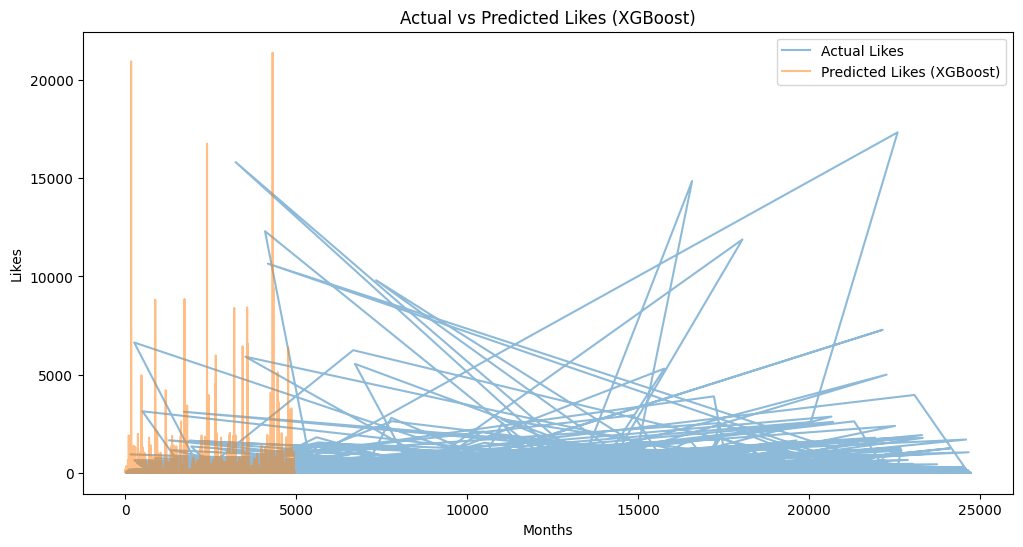

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Likes', alpha=0.5)
plt.plot(y_pred, label='Predicted Likes (XGBoost)', alpha=0.5)
plt.title('Actual vs Predicted Likes (XGBoost)')
plt.xlabel('Months')
plt.ylabel('Likes')
plt.legend()
plt.show()